# RvF: Real vs Fake face Detection

## Getting Started

To understand CNN theoretically, other than using online resources, you can refer to [CNN Crash Course (U-M Only)](https://docs.google.com/presentation/d/1p3EWFMfTNT773PEt3q16tlLxQ4FuD-JTwnTj1A_N4a0/edit?usp=sharing)

Here is also a guide on [PyTorch for CNNS](https://github.com/MichiganDataScienceTeam/W24-RvF/blob/main/notebooks/pytorch_cnn.ipynb)

In [ ]:
#this might be a bit of a disadvantage for me because i do not use PyTorch,
#i use Tableau, so the whole architechture of the CNN i'll change it...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change this to the folder containing your Kaggle API key (kaggle.json)
%env KAGGLE_KEY_FOLDER=MDST/RvF
!mkdir data
!export KAGGLE_CONFIG_DIR=/content/drive/MyDrive/$KAGGLE_KEY_FOLDER && wget -O - "https://raw.githubusercontent.com/MichiganDataScienceTeam/W24-RvF/main/data/download.sh" | bash -s rvf10k


!rm -r W24-RvF starter_code
!git clone -q https://github.com/MichiganDataScienceTeam/W24-RvF.git
!mv W24-RvF/starter_code .
!rm -r W24-RvF

Mounted at /content/drive
env: KAGGLE_KEY_FOLDER=MDST/RvF
--2025-09-09 12:20:35--  https://raw.githubusercontent.com/MichiganDataScienceTeam/W24-RvF/main/data/download.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2990 (2.9K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   2.92K  --.-KB/s    in 0s      

2025-09-09 12:20:36 (44.2 MB/s) - written to stdout [2990/2990]

Current Python Environment: /usr/local/bin/python
ls: cannot access 'data/rvf10k': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
  

In [ ]:
!git clone https://github.com/MichiganDataScienceTeam/RvF-Challenge.git


Cloning into 'RvF-Challenge'...
remote: Enumerating objects: 10045, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 10045 (delta 11), reused 7 (delta 1), pack-reused 10019 (from 1)
Receiving objects: 100% (10045/10045), 272.72 MiB | 23.87 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (10011/10011), done.


In [ ]:
from starter_code.dataset import RvFDataset, get_loaders
from starter_code.train import train_model, plot_performance, load_model


#again, this might be a bit of a disadvantage for me because i do not use PyTorch,
#i use Tableau, so the whole architechture of the CNN i'll change it...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
import cv2
import glob
from PIL import Image

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split





## Step 1: Define Preprocessing

There are numerous advantages for preprocessing, depending on the topic of your program. For our project on CNN for RvF, the two major benefits of preprocessing are:

### Normalization
Normalization brings features onto a similar scale, preventing certain features from dominating the learning process due to larger magnitude. By normalizing the data, we ensure that each feature contributes proportionally to the learning process, leading to efficient convergence and model generalization.

### Generalization
Preprocessing techniques help to generalize the model better to unseen data by introducing variability in the training images. This prevents the model from overfitting to the training data. Examples of such preprocessing are random crop, random jitter, etc.

Here is a more detailed guide on [Image Preprocessing](https://github.com/MichiganDataScienceTeam/W24-RvF/blob/main/notebooks/image_preprocessing.ipynb).

In [ ]:
# load training dataset
train_dataset = RvFDataset("train", data_directory = "/content/RvF-Challenge/data/rvf10k")
# load valid/test dataset
valid_dataset = RvFDataset("valid", data_directory = "/content/RvF-Challenge/data/rvf10k")

In [ ]:
import os
from PIL import Image
import random

# Path to the training directory
train_dir = "/content/RvF-Challenge/data/rvf10k/train"

# Initialize a list to hold all images
all_train_images = []
all_label_images = []

# Loop through both 'fake' and 'real' folders
for label in ['fake', 'real']:
    folder_path = os.path.join(train_dir, label)

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        try:
            # Open and load the image
            img = Image.open(file_path).resize((128, 128)).convert('RGB')  # convert to RGB just in case
            img = np.array(img) / 255.0  # normalize to [0, 1]
            all_train_images.append(img)
            all_label_images.append(label)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

all_label_images = [0 if label == "fake" else 1 for label in all_label_images]

1
7000
7000


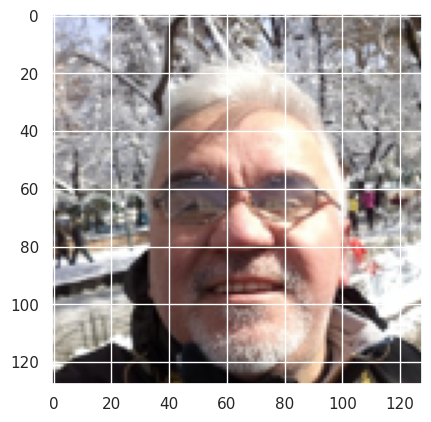

In [ ]:
idx = np.random.randint(len(all_train_images))

plt.imshow(all_train_images[idx])
print(all_label_images[idx])
print(len(all_train_images))
print(len(all_label_images))
plt.show()

### TODO1: Define Your Preprocessing

In [ ]:
#again, this might be a bit of a disadvantage for me because i do not use PyTorch,
#i use Tableau, so the whole architechture of the CNN i'll change it...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
import cv2
import glob
from PIL import Image

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split



## Step 2: Model Definition

Below is an example of a class definition in Python for a very simple convolutional neural network called BasicCNN. Let's break its components down.

In [ ]:
#class BasicCNN(nn.Module): # Net inherits from nn.Module
    #def __init__(self):"""Constructor for the neural network."""
        #super(BasicCNN, self).__init__()        # Call superclass constructor
        #self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1)
        #self.conv2 = nn.Conv2d(in_channels=16, out_channels=128, kernel_size=3, stride=1)
        #self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.relu = nn.ReLU()
        #self.flatten = nn.Flatten()
        #self.fc = nn.Linear(3200, 10)

   # def forward(self, x):
        #z1 = self.conv1(x)
        #h1 = self.relu(z1)
        #p1 = self.pool(h1)

        #z2 = self.conv2(p1)
        #h2 = self.relu(z2)
        #p2 = self.pool(h2)

        #flat = self.flatten(p2)
        #z = self.fc(flat)

        #return z

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

# Convert the list of images to a NumPy array

x_train, x_test, y_train, y_test = train_test_split(all_train_images, all_label_images, test_size=0.2, stratify=all_label_images, random_state=42)


x_train = np.array(x_train)
x_test = np.array(x_test)


y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

RvF_Challenge_model = models.Sequential([
    layers.Conv2D(32, kernel_size=3, padding='same',activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=2), # -> (64, 64, 32)

    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),# -> (32,32,64)

    layers.Conv2D(128,kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),# -> (16,16,128)

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(2, activation='softmax')
])


RvF_Challenge_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

RvF_Challenge_model.fit(x_train[:350], y_train[:350], epochs = 10, batch_size=35, validation_data=(x_test,y_test))
#84% of accuracy, i only limit at 350 since i don't think my laptop is fine processing this... it is relatively an old laptop

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5690 - loss: 0.7824 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.5378 - loss: 0.6897 - val_accuracy: 0.5193 - val_loss: 0.6903
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.6229 - loss: 0.6743 - val_accuracy: 0.5829 - val_loss: 0.6808
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6258 - loss: 0.6587 - val_accuracy: 0.5357 - val_loss: 0.7058
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6531 - loss: 0.6211 - val_accuracy: 0.5907 - val_loss: 0.6707
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.7060 - loss: 0.6114 - val_accuracy: 0.5721 - val_loss: 0.6923
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7286 - loss: 0.5630 - val_accuracy: 0.6071 - val_loss: 0.7143
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7429 - loss: 0.5118 - val_accuracy: 0.5914 - val_loss:

#### Subclass Inheritance

This first criteria is met by defining the subclass relationship between `BasicCNN` and `nn.Module`
- When we write the first line of the class defintion, we write `BasicCNN(nn.Module):` to indicate that `BasicCNN` is a subclass of `nn.Module`
- On line 4, we call the superclass constructor for this model:
  
  ```py
    super(BasicCNN, self).__init__()
  ```

#### Layer Definition

For PyTorch to recognize that a layer is a part of our model, we must add all them as **member variables** of the `BasicCNN`. This can be done in the class constructor `__init__()` by evoking the `self` pointer:

```py
self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1)
self.conv2 = nn.Conv2d(in_channels=16, out_channels=128, kernel_size=3, stride=1)
self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
self.relu = nn.ReLU()              
self.flatten = nn.Flatten()
self.fc = nn.Linear(3200, 10)
```

This code defines 5 layers for our model:
- `conv1`: convolution layer that expects 1 channel and has 16 filters with filter size of 3 pixels and a stride of 1
- `conv2`: convolution layer that expects 16 channel and has 128 filters with filter size of 3 pixels and a stride of 1
- `pool`: max pooling layer that has a window size of 2 and a stride of 2. We will reuse this layer multiple times (since max pooling is stateless)
- `relu`: activation layer using the ReLU activation function. We will reuse this activation layer multiple times (since activation functions are stateless)
- `fc`: a dense layer that expects a vector with 3200 components and returns a vector with 10 components (one for each of the 10 classes in the MNIST dataset)

#### Defining the Forward Pass

The third criteria is more tricky - we have to define a function called `forward()` that specifies _how_ to call each layer and make predictions for some input image. For the model above, we have the following definition for this function

```py
def forward(self, x):
   z1 = self.conv1(x)
   h1 = self.relu(z1)
   p1 = self.pool(h1)

   z2 = self.conv2(p1)
   h2 = self.relu(z2)
   p2 = self.pool(h2)

   flat = self.flatten(p2)
   z = self.fc(flat)

   return z
```

Let's break down the first few lines of this function:
1. The `forward()` function takes as input the parameters
   1. `self` - is the self-pointer, is equivalent to `this` in C++
   2. `x` - the input to the model - in this case an image of a handwritten digit.
2. The image `x` is immediately passed as input into the first convolution layer `conv1` to perform convolution. The output of this convolution layer is saved to the local variable `z1`.
   1. Note that in this case, `self.conv` is actually a **functor** - it is an object that can be called like a function to produce an output
3. The convolution layer output `z1` is passed through the ReLU activation layer to get the activated outputs `h1`
4. The activated output has max pooling applied to downsample it, and the output is then saved the result to `p1`.
5. The pooled output is passed as input the second convolution layer `conv2` to perform another round of convolution. The output of this convolution layer is saved to the local variable `z2`
   1. 🚨 As `p1` has 16 channels, we MUST define `conv2` to accept 16 input channels. It is SUPER important to be careful to make sure that your input to your convolution layer has the correct number of channels, otherwise PyTorch will throw errors!
6. ...

And so forth!

### TODO2: Define Your Model

Here are the restrictions:
- your first convolution layer must accept images that have only 4 channels
- your last convolution layer must accept images that have only 256 channels
- your CNN output should return a vector with 2 entries
- if you find difficulties in understanding the model, visit [Pytorch and CNN](https://github.com/MichiganDataScienceTeam/W24-RvF/blob/main/notebooks/pytorch_cnn.ipynb)

Other than that, you have as much flexibility as you prefer for how you want to define your model!

44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 316ms/step
[0.57845414 0.421546  ]
0


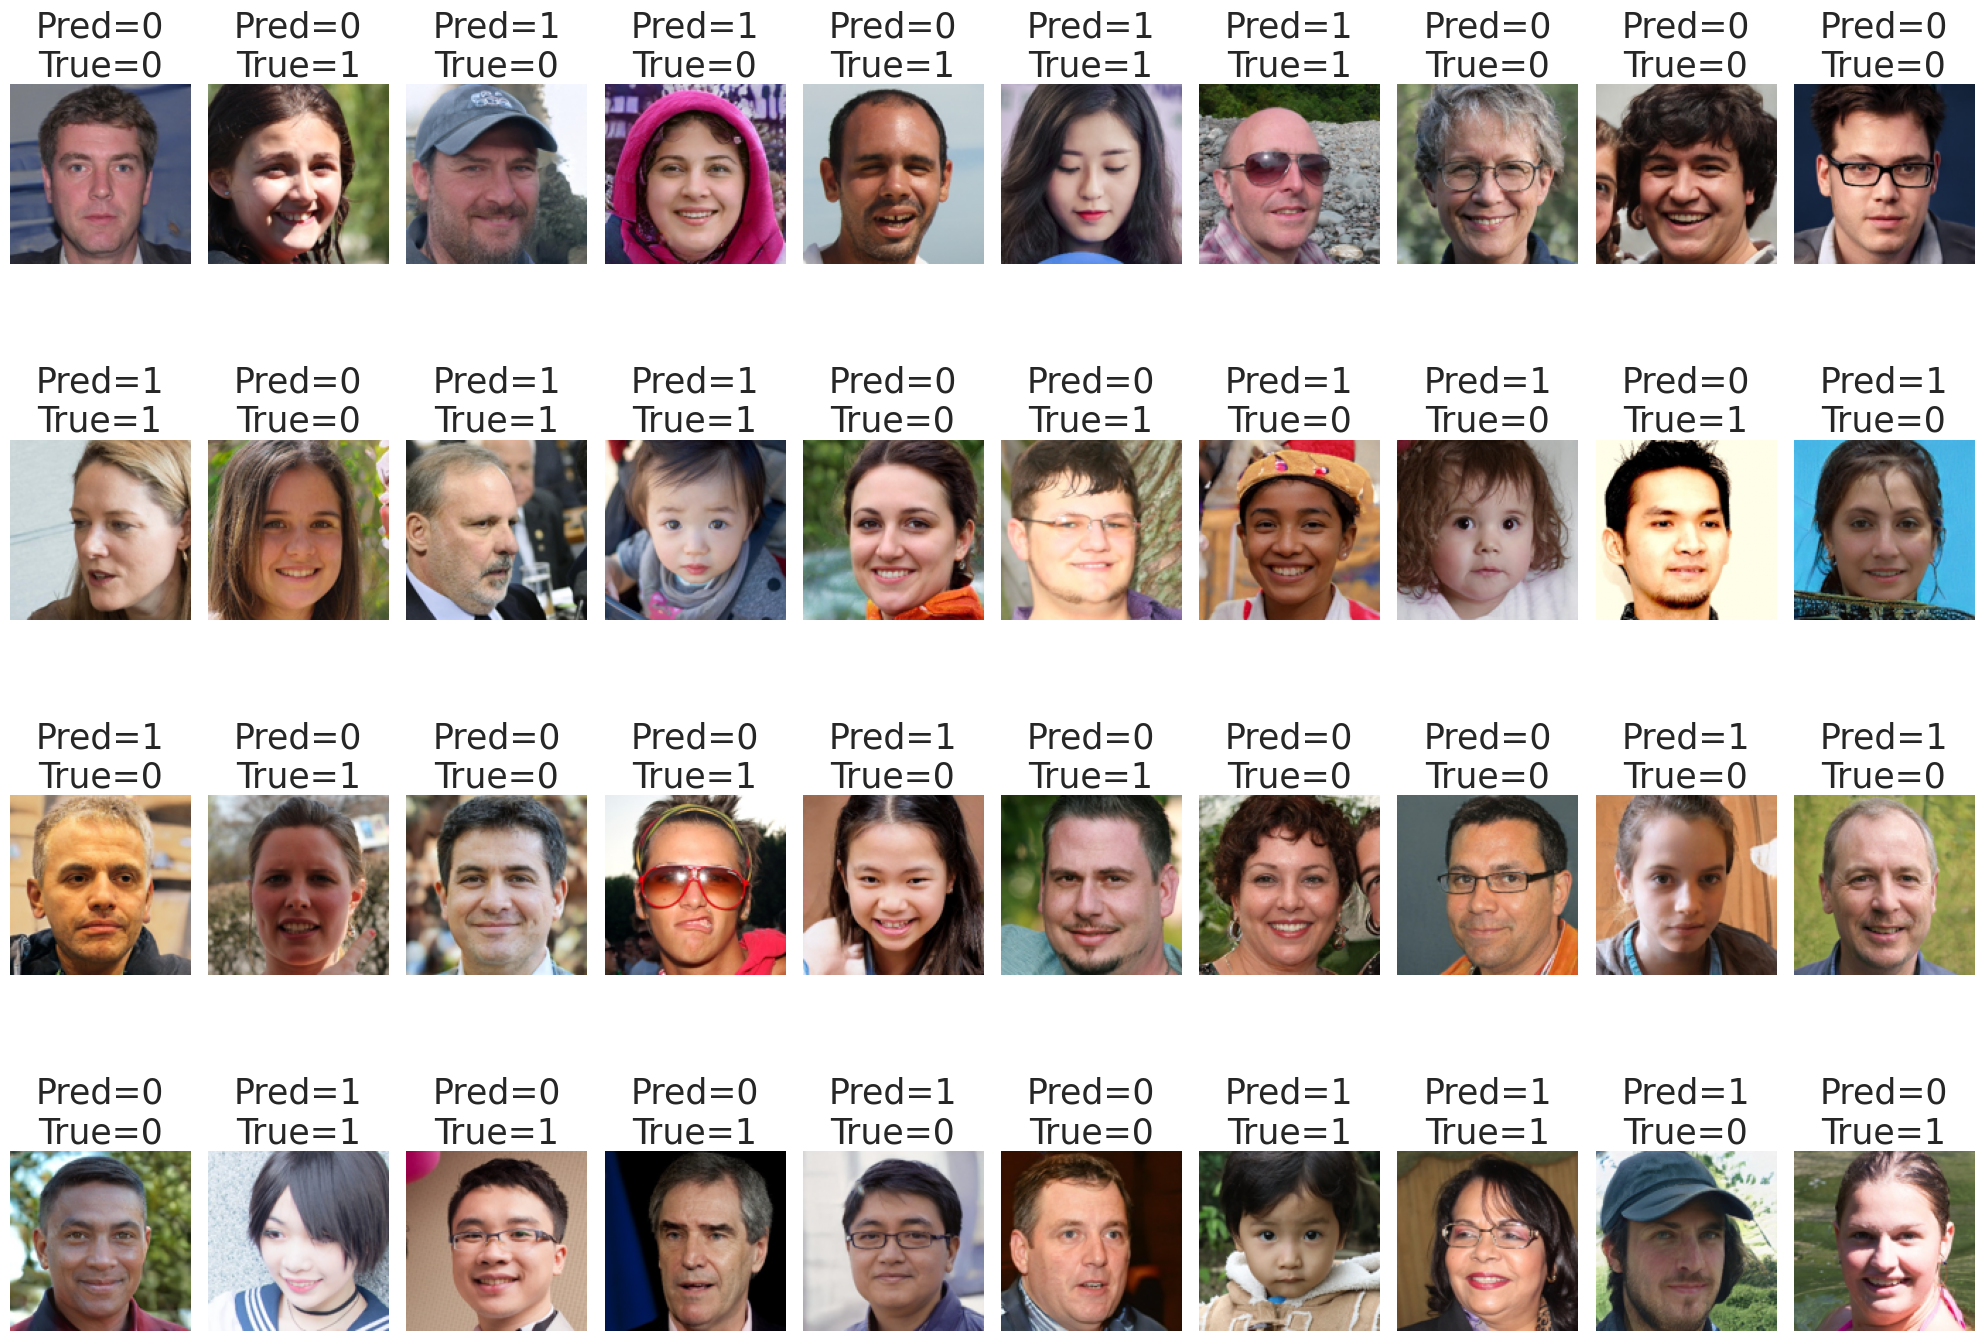

In [ ]:
predictions = RvF_Challenge_model.predict(x_test)
print(predictions[0])

prediction_labels = predictions[0].argmax()
print(prediction_labels)

num_samples_to_plot = min(40, len(x_test)) # Ensure we don't exceed the number of available samples
true_labels = np.argmax(y_test[:num_samples_to_plot], axis = 1)
predicted_labels = np.argmax(predictions[:num_samples_to_plot], axis = 1)


plt.figure(figsize=(20, 15))
for i in range(num_samples_to_plot):
    plt.subplot(4, 10, i+1)  # 2 rows, 10 images per row
    plt.imshow(x_test[i])
    plt.title(f"Pred={predicted_labels[i]}\nTrue={true_labels[i]}", fontsize=25)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Step 3: Model Training


For model training, we utilized functions wirtten in starter_code directory located under "Optional-Challenge/RvF". They are ready to use, and feel free to refer back to them.

This is the end of RvF challenge! Please save your file and submit your work.